![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [69]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

netflix_df=pd.read_csv('netflix_data.csv')
print(netflix_df.head())
print(netflix_df.columns)

print(netflix_df.groupby('type'))

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [70]:
print(netflix_df.groupby('type').count())

         show_id  title  director  ...  duration  description  genre
type                               ...                              
Movie       5377   5377      5214  ...      5377         5377   5377
TV Show     2410   2410       184  ...      2410         2410   2410

[2 rows x 10 columns]


In [71]:
netflix_subset=netflix_df[netflix_df['type']=='Movie']

netflix_movies=netflix_df[['title','country','genre','release_year','duration']]

print(netflix_movies.head())

   title        country             genre  release_year  duration
0     3%         Brazil  International TV          2020         4
1   7:19         Mexico            Dramas          2016        93
2  23:59      Singapore     Horror Movies          2011        78
3      9  United States            Action          2009        80
4     21  United States            Dramas          2008       123


In [72]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies[netflix_movies.duration < 60]

In [73]:
short_movies.groupby(['country','genre','release_year']).mean('duration')

duration
country       genre         release_year          
Argentina     Crime TV      2015               1.0
                            2018               1.0
                            2019               2.0
                            2020               1.0
              Docuseries    2020               1.0
...                                            ...
United States Uncategorized 2015              34.5
                            2016              45.0
                            2017              14.0
                            2019              29.0
Uruguay       Docuseries    2019               1.0

[863 rows x 1 columns]

genre
Action                  [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Anime Features          [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Anime Series            [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
British TV              [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Children                [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Classic                 [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Classic Movies          [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Comedies                [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Crime TV                [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Documentaries           [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Docuseries              [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Dramas                  [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Horror Movies           [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
International Movies    [[AxesSu

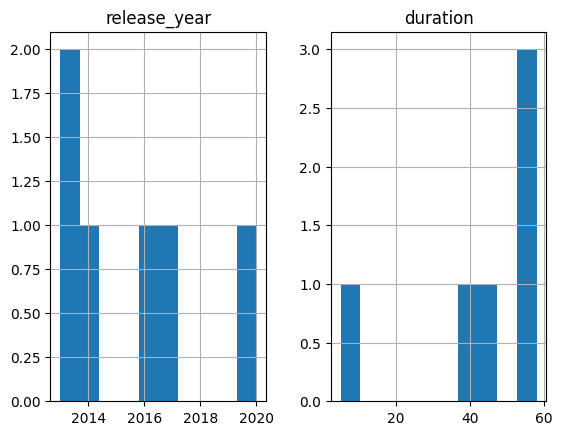

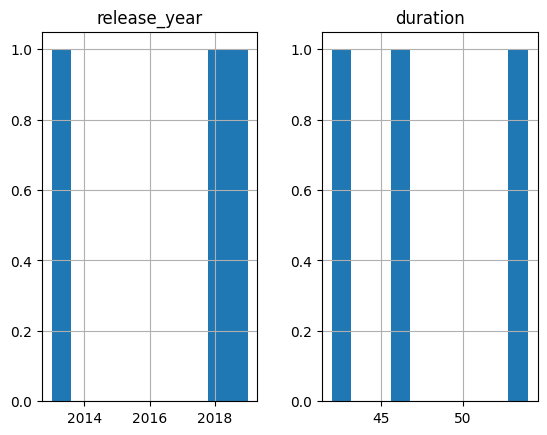

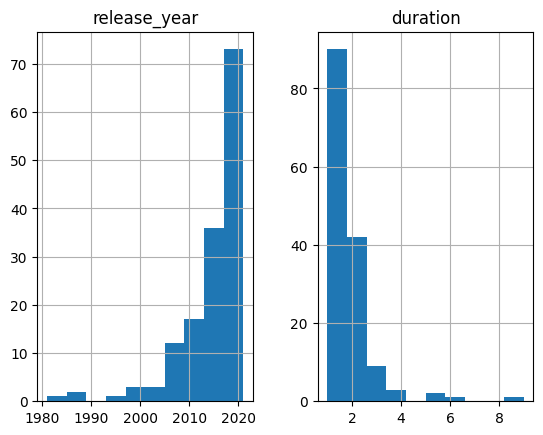

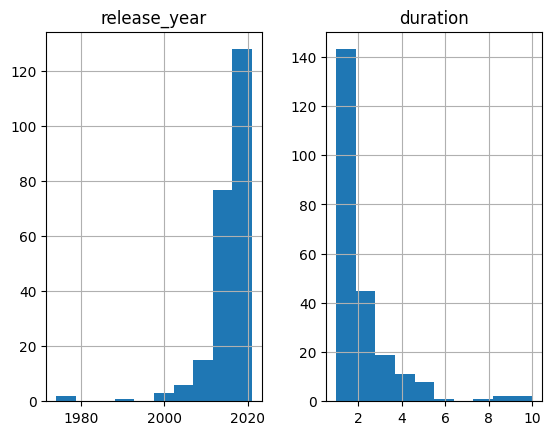

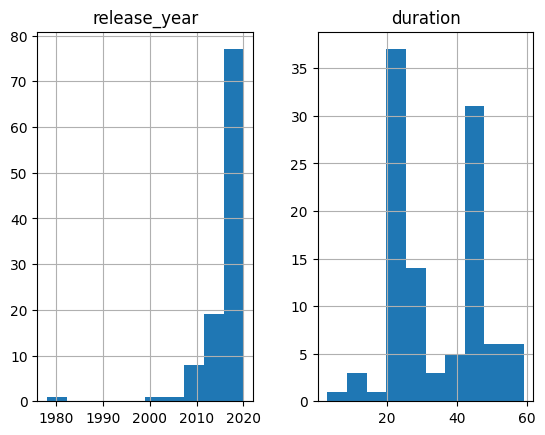

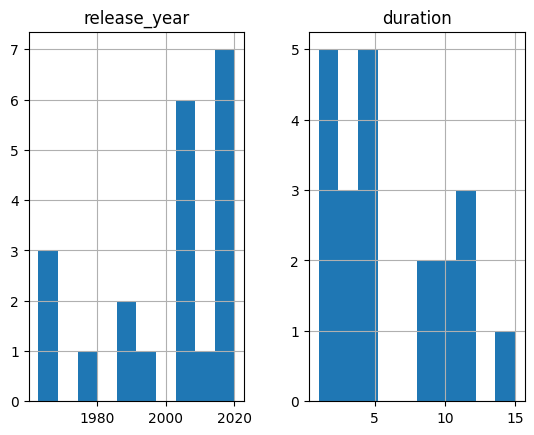

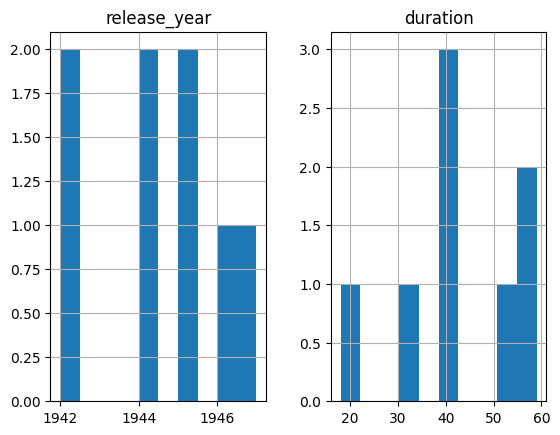

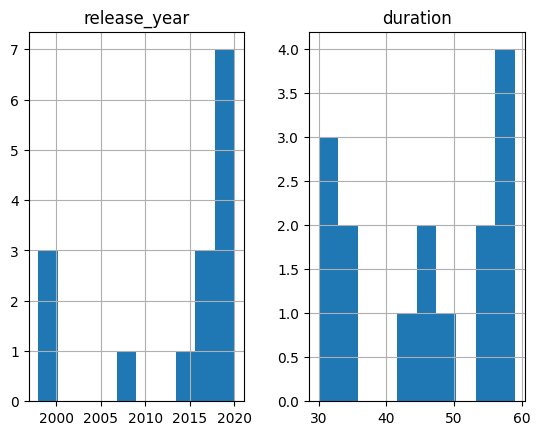

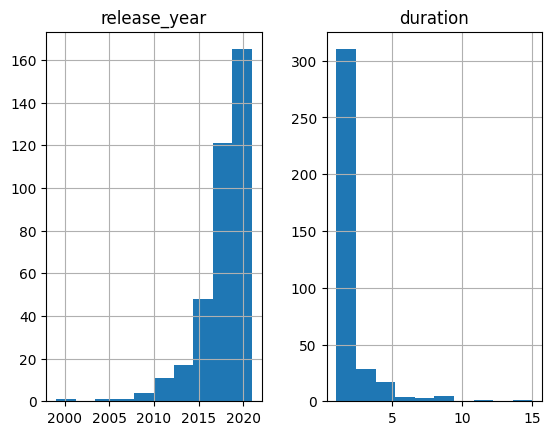

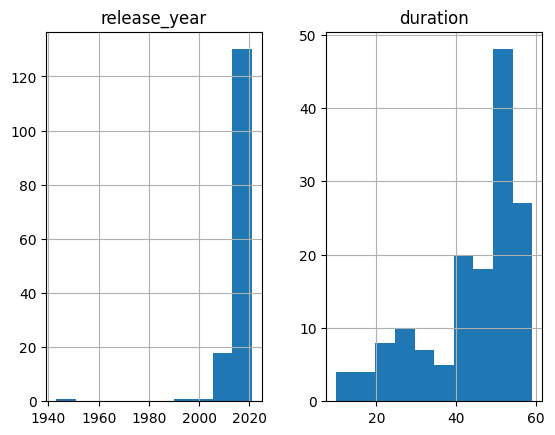

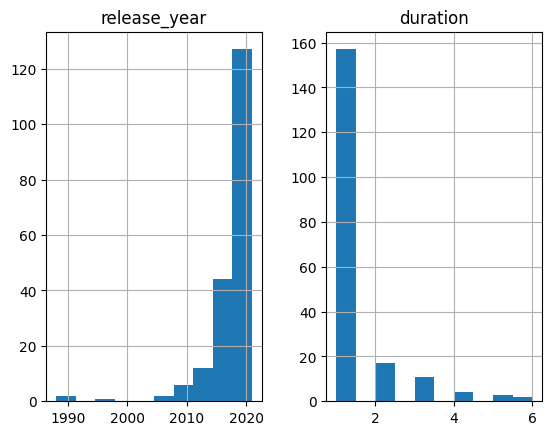

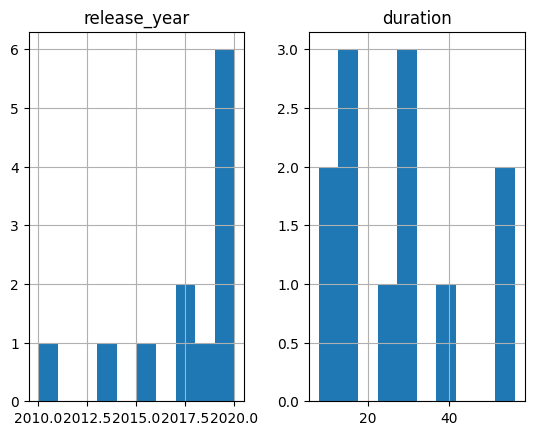

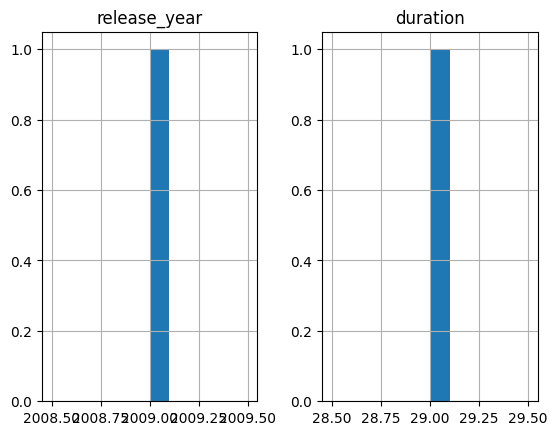

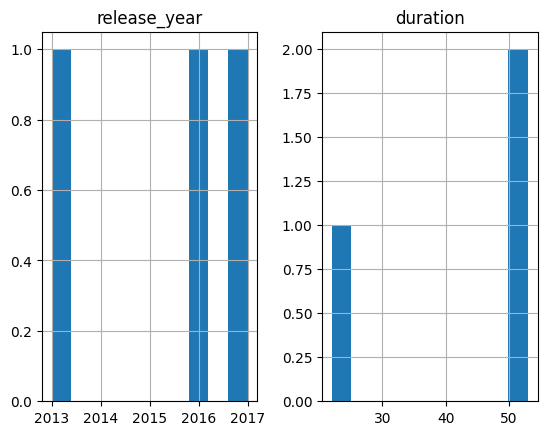

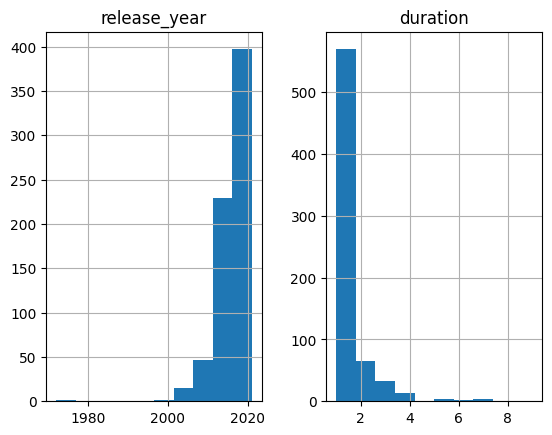

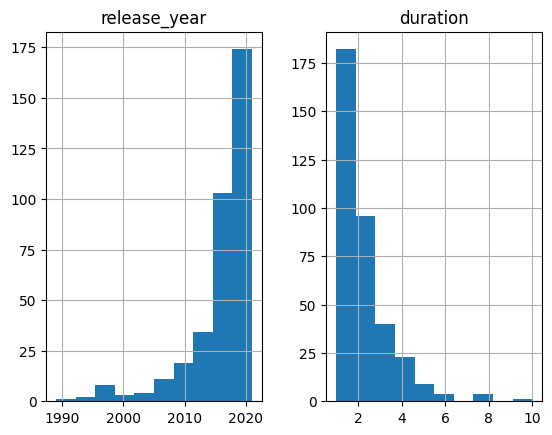

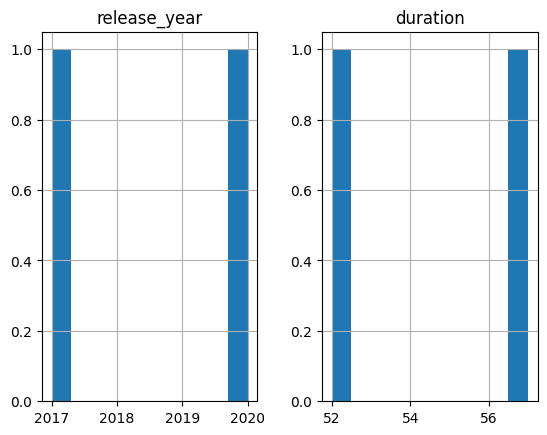

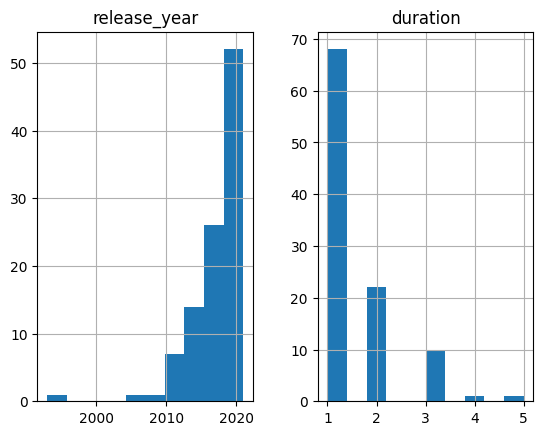

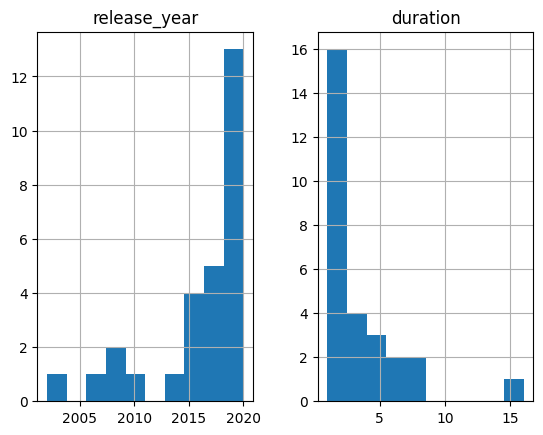

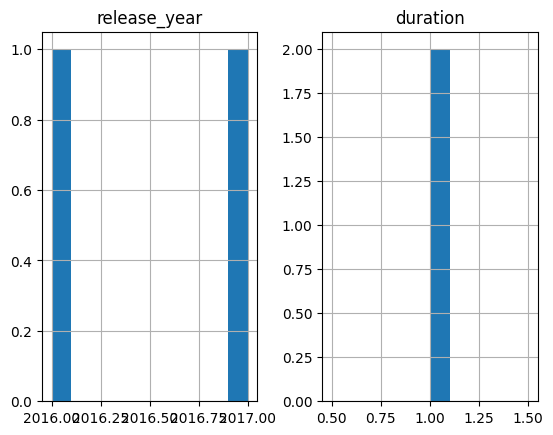

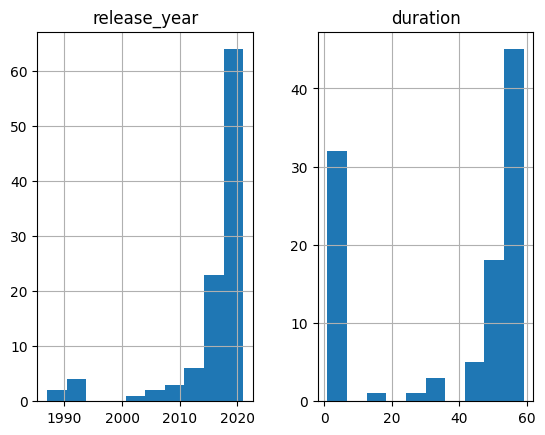

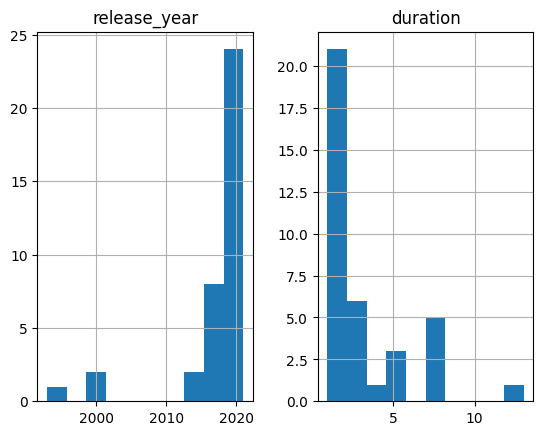

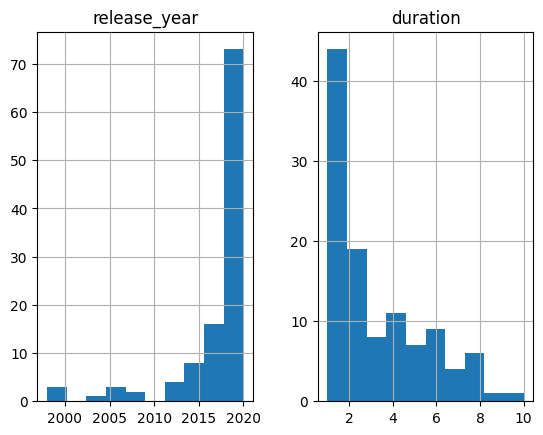

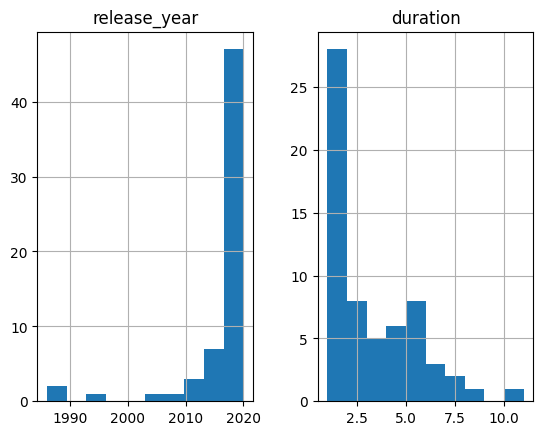

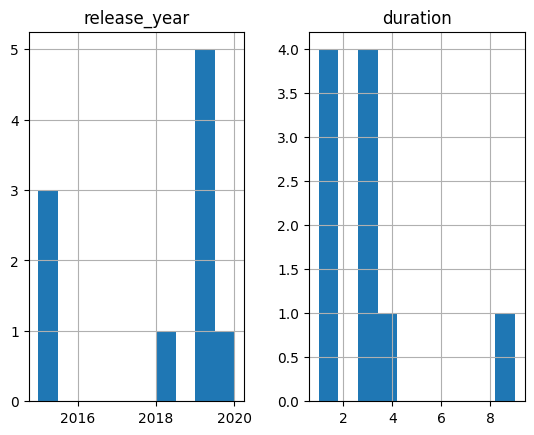

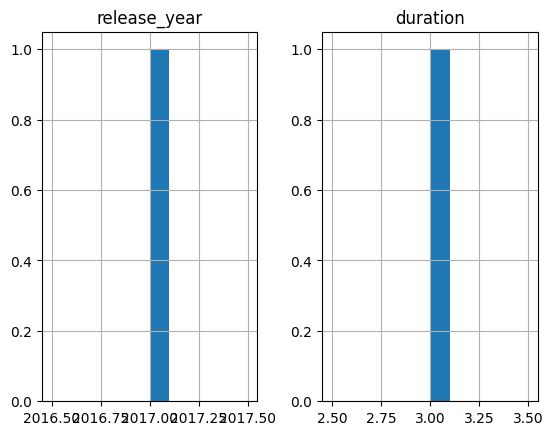

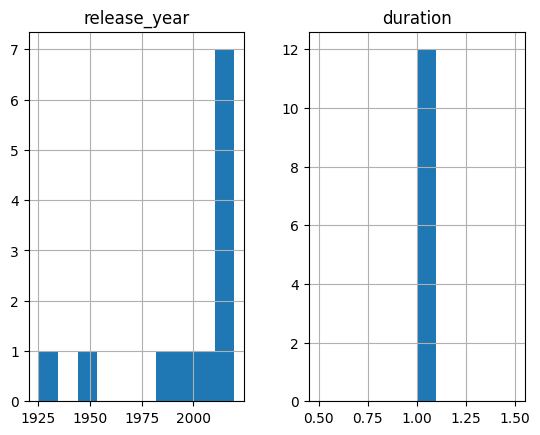

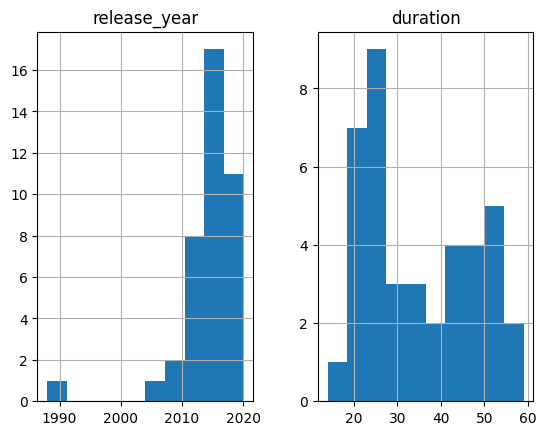

In [74]:
short_movies.groupby('genre').hist()

In [75]:
colors = []

for _, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('blue')
    elif row['genre'] == 'Documentaries':
        colors.append('green')
    elif row['genre'] == 'Stand-Up':
        colors.append('red')
    else:
        colors.append('gray')

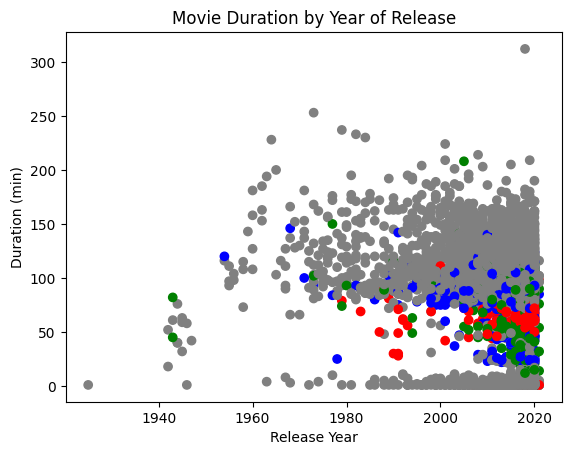

In [76]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

ax.scatter(netflix_movies['release_year'],netflix_movies['duration'],c=colors)

# Labeling
ax.set_xlabel('Release Year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release')

# Show plot
plt.show()

In [77]:
answer= 'no'